Nama : **BANU HARLI TRIMULYA SUANDI AS**

Program mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.



In [47]:
# Import library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import zipfile

In [48]:
# mempersiapkan data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-17 11:13:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.47MB/s    in 4m 44s  

2021-06-17 11:18:02 (1.09 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [49]:
# melakukan ekstraksi pada file zip

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = '/content/output/train'
validation_dir = '/content/output/val'

In [50]:
!pip install split-folders
import splitfolders

splitfolders.ratio(base_dir, output="output", seed=1337, ratio=(.6, .4), group_prefix=None)

Copying files: 2188 files [00:01, 1534.13 files/s]


In [51]:
#menghitung total file rock
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [52]:
#menghitung total file paper
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [53]:
#menghitung total file scissors
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [54]:
# mempersiapkan data yang akan diberikan ke model
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest',
                                   validation_split=0.4)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  horizontal_flip=True,
                                  shear_range = 0.2,
                                  fill_mode = 'nearest',
                                  validation_split=0.4)

In [55]:
# objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical',)
 
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [56]:
# membuat arsitektur dari CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [57]:
# menentukan loss function serta optimizer
model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']) 

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [59]:
# latih model dengan model.fit 
history = model.fit(train_generator,
                    steps_per_epoch = 41, 
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = 27, 
                    verbose = 2)

Epoch 1/10
41/41 - 89s - loss: 1.7384 - accuracy: 0.4665 - val_loss: 1.6709 - val_accuracy: 0.3657
Epoch 2/10
41/41 - 86s - loss: 0.7565 - accuracy: 0.7020 - val_loss: 0.4490 - val_accuracy: 0.8519
Epoch 3/10
41/41 - 85s - loss: 0.4217 - accuracy: 0.8483 - val_loss: 0.3304 - val_accuracy: 0.8924
Epoch 4/10
41/41 - 85s - loss: 0.3057 - accuracy: 0.8864 - val_loss: 0.3301 - val_accuracy: 0.8750
Epoch 5/10
41/41 - 85s - loss: 0.2620 - accuracy: 0.8986 - val_loss: 0.2519 - val_accuracy: 0.9062
Epoch 6/10
41/41 - 92s - loss: 0.1985 - accuracy: 0.9268 - val_loss: 0.2214 - val_accuracy: 0.9201
Epoch 7/10
41/41 - 92s - loss: 0.1821 - accuracy: 0.9383 - val_loss: 0.1914 - val_accuracy: 0.9387
Epoch 8/10
41/41 - 87s - loss: 0.1352 - accuracy: 0.9512 - val_loss: 0.1654 - val_accuracy: 0.9410
Epoch 9/10
41/41 - 91s - loss: 0.1278 - accuracy: 0.9604 - val_loss: 0.1298 - val_accuracy: 0.9606
Epoch 10/10
41/41 - 91s - loss: 0.1367 - accuracy: 0.9573 - val_loss: 0.1218 - val_accuracy: 0.9630


Saving batu.png to batu (1).png
batu.png
rock


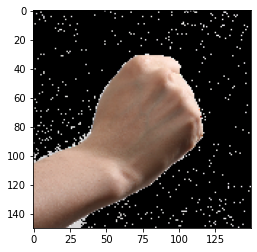

In [62]:
# untuk secara interaktif memilih sebuah berkas gambar yg telah di upload, kemudian melakukan resize gambar dan mengubahnya menjadi larik numpy
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
      print('paper')
  elif classes[0,1]!=0:
      print('rock')
  else:
      print('scissors')